In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Thesis/Dataset_spine.csv")
df.columns

Index(['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8', 'Col9',
       'Col10', 'Col11', 'Col12', 'Class_att', 'Unnamed: 13'],
      dtype='object')

In [ ]:
df = df.drop('Unnamed: 13', axis=1)

In [ ]:
df

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal


In [ ]:
df.Class_att.describe()
df.Class_att.unique()

array(['Abnormal', 'Normal'], dtype=object)

In [ ]:
df.Class_att[df.Class_att == 'Normal'] = 0
df.Class_att[df.Class_att == 'Abnormal'] = 1

<ipython-input-7-1f7b960c718a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Class_att[df.Class_att == 'Normal'] = 0
<ipython-input-7-1f7b960c718a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Class_att[df.Class_att == 'Abnormal'] = 1


In [ ]:
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,1


In [ ]:
X_f_importance = df.drop(['Class_att'], axis=1)
y_f_importance = df['Class_att'].astype('int')
X_f_importance

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171
...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192


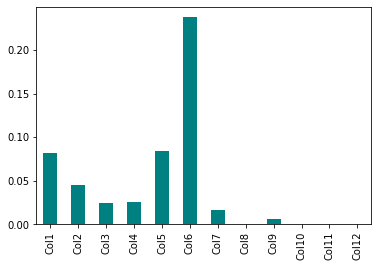

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import sklearn
importances = mutual_info_classif(X_f_importance, y_f_importance, random_state = 42)
feat_importances = pd.Series(importances, df.columns[0:len(df.columns)-1])
feat_importances.plot(kind='bar', color='teal')
plt.show()

In [ ]:
X = X_f_importance.drop(['Col8', 'Col10', 'Col11', 'Col12'], axis=1)
y = y_f_importance

## KNN

In [ ]:
# max_val = .8
# n=-1
# for i in range(1000, 3001):
#   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)
#   neigh = KNeighborsClassifier(n_neighbors=3)
#   neigh.fit(X_train, y_train)
#   if neigh.score(X_test, y_test) > max_val:
#     max_val = neigh.score(X_test, y_test)
#     n=i

# checked till 3000
# max acc 0.912621359223301 at random_state = 87

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=87)
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

0.912621359223301

## RF

In [ ]:
# max_val = 0.91
# n=-1
# for i in range(1200, 2000):
#   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)
#   from sklearn.datasets import make_classification
#   rf = RandomForestClassifier(max_depth=2, random_state=0)
#   rf.fit(X_train, y_train)
#   if rf.score(X_test, y_test) > max_val:
#     max_val = rf.score(X_test, y_test)
#     n=i

#checked till the number of 2000
# n = 308

In [ ]:
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=308)

param_grid = {
    'random_state':list(range(1,51))
}
rf = RandomForestClassifier()

CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)

print(CV_rf.best_estimator_)

print(CV_rf.best_params_)

print(CV_rf.score(X_test, y_test))

0.8543689320388349

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=308)
from sklearn.datasets import make_classification
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.912621359223301

## DT

In [ ]:
# mx_val = 0.85
# n=-1
# m=-2
# for i in range(2001):
#   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)
#   for j in range(500):
#     dcsn_tree = DecisionTreeClassifier(random_state=j)
#     dcsn_tree.fit(X_train, y_train)
#     if dcsn_tree.score(X_test, y_test) > mx_val:
#       mx_val = dcsn_tree.score(X_test, y_test)
#       n=i
#       m=j



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1985)
dcsn_tree = DecisionTreeClassifier(random_state=419)
dcsn_tree.fit(X_train, y_train)
dcsn_tree.score(X_test, y_test)

0.9320388349514563

##GaussianNB

In [ ]:
# max_val = 0.9029126213592233
# n=-1

# for i in range(25000, 30001):
#   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)
#   gnb = GaussianNB()
#   gnb.fit(X_train, y_train)
#   if gnb.score(X_test, y_test) > max_val:
#     max_val = gnb.score(X_test, y_test)
#     n=i


# checked till 30000
# max acc 0.9029126213592233

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=8077)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.score(X_test, y_test)

0.9029126213592233

##SGDClassifier

In [ ]:
# max_val = 0.8
# m=-1
# n=-1
# for i in range(200):
#   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)
#   for j in range(200):
#     sgd = SGDClassifier(random_state=j)
#     sgd.fit(X_train, y_train)
#     if sgd.score(X_test, y_test) > max_val:
#       max_val = sgd.score(X_test, y_test)
#       n=i
#       m=j

# checked till 200 in both

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=85)
sgd = SGDClassifier(random_state=85)
sgd.fit(X_train, y_train)
sgd.score(X_test, y_test)

0.9320388349514563

##LogisticRegression

In [ ]:
# max_val = .87
# n=-1

# for i in range(2000, 2501):
#   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)
#   lr = LogisticRegression()
#   lr.fit(X_train, y_train)
#   if lr.score(X_test, y_test)>max_val:
#     max_val = lr.score(X_test, y_test)
#     n=i

#checked till 2500
# amx acc 0.9320388349514563 at random_state = 1138

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1138)
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9320388349514563

## Shortcut way
### All models are trained and tested in a single code block

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
rf = RandomForestClassifier(max_depth=2, random_state=0)
dcsn_tree = DecisionTreeClassifier(random_state=419)
gnb = GaussianNB()
sgd = SGDClassifier(random_state=85)
lr = LogisticRegression()

# random_states = [87, 308, 1985, 8077, 85, 1138]
model_names = ['neigh', 'rf', 'dscn_tree', 'gnb', 'sgd', 'lr']
model_preds = {}

models = {
    neigh : 87,
    rf : 308,
    dcsn_tree : 1985,
    gnb : 8077,
    sgd : 85,
    lr : 1138
}
best_models = []
n=0
max_val = 0.1

print('Accuracies : \n')
for model, random_state in models.items():
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_state)
  model.fit(X_train, y_train)
  print(model_names[n], ': ', model.score(X_test, y_test))
  model_preds[model_names[n]] = model.predict(X_test)
  if model.score(X_test, y_test) == max_val:
    max_val = model.score(X_test, y_test)
    best_models.append(model_names[n])
  elif model.score(X_test, y_test) > max_val:
    best_models.clear()
    max_val = model.score(X_test, y_test)
    best_models.append(model_names[n])
  n+=1

print("\nThe Best models: ", best_models)
if len(best_models) > 1:
  print("These models mentioned in the above list have the same value! ", "That is ", max_val)

# print('\n\n', model_preds)

Accuracies : 

neigh :  0.912621359223301
rf :  0.912621359223301
dscn_tree :  0.9320388349514563
gnb :  0.9029126213592233
sgd :  0.9320388349514563
lr :  0.9320388349514563

The Best models:  ['dscn_tree', 'sgd', 'lr']
These models mentioned in the above list have the same value!  That is  0.9320388349514563


##StackingClassifier

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
# max_val = 0.9320388349514563
# n=-1
# for i in range(3000, 5000):
#   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=i)
#   estimators = [('rf', RandomForestClassifier(max_depth=2, random_state=0)),('knn', KNeighborsClassifier(n_neighbors=3)), ('dt', DecisionTreeClassifier(random_state=419)), ('gnb', GaussianNB()), ('sgd', SGDClassifier(random_state=85))]
#   from sklearn.model_selection import train_test_split
#   clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
#   clf.fit(X_train, y_train)
#   if clf.score(X_test, y_test) > max_val:
#     max_val = clf.score(X_test, y_test)
#     n=i

#checked till 5000

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=705)
estimators = [('rf', RandomForestClassifier(max_depth=2, random_state=0)),('knn', KNeighborsClassifier(n_neighbors=3)), ('dt', DecisionTreeClassifier(random_state=419)), ('gnb', GaussianNB()), ('sgd', SGDClassifier(random_state=85))]
from sklearn.model_selection import train_test_split
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9320388349514563

In [ ]:
!pip install mlxtend --upgrade --no-deps
from mlxtend.classifier import StackingClassifier

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=87)
clf1 = KNeighborsClassifier(n_neighbors=3)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=133)
clf2 = RandomForestClassifier(max_depth=2, random_state=0)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1640)
clf3 = DecisionTreeClassifier(random_state=419)

clf4 = GaussianNB()
clf5 = SGDClassifier(random_state=85)
clf6 =  LogisticRegression()


lr = LogisticRegression()
# sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], use_probas=True, meta_classifier=lr)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 6.5 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
# max_val = 0.9320388349514563
# n=-1
# for i in range(2001, 5001):
#   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)
#   sclf.fit(X_train, y_train)
#   if sclf.score(X_test, y_test) > max_val:
#     max_val = sclf.score(X_test, y_test)
#     n=i
# checked till 5000

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1985)
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3, clf4, clf5, clf6], meta_classifier=lr)
sclf.fit(X_train, y_train)
print(sclf.score(X_test, y_test))

0.9320388349514563


## Userd defined stacking classifer

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1155)
X_test

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col9
210,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,0.396364,12.7802
131,69.781006,13.777465,58.000000,56.003541,118.930666,17.914560,0.668563,8.7164
147,55.080766,-3.759930,56.000000,58.840695,109.915367,31.773583,0.651920,9.0278
61,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,0.527584,18.6012
220,44.489275,21.786433,31.474154,22.702842,113.778494,-0.284129,0.547080,13.4464
...,...,...,...,...,...,...,...,...
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,0.198920,10.7146
208,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,0.574775,13.0473
11,31.232387,17.715819,15.500000,13.516568,120.055399,0.499751,0.608343,9.2589
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,0.131973,7.7676


In [ ]:
output_df = pd.DataFrame(model_preds) # converting dictionary into datafrmae

output_df.insert(0, 'id', [i for i in range(103)], True) # add column named 'id'
X_test.insert(0, 'id',[i for i in range(103)], True)  # add column named 'id'
y_test = pd.DataFrame(y_test)
y_test.insert(0, 'id', [i for i in range(103)], True) # add column named 'id'

stacking_df = X_test.merge(output_df, on='id')

In [ ]:
stacking_df = X_test.merge(output_df, on='id').merge(y_test, on='id')
stacking_df

,id,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col9,neigh,rf,dscn_tree,gnb,sgd,lr,Class_att
0,0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,0.396364,12.7802,1,1,0,1,1,1,0
1,1,69.781006,13.777465,58.000000,56.003541,118.930666,17.914560,0.668563,8.7164,0,1,0,1,1,1,1
2,2,55.080766,-3.759930,56.000000,58.840695,109.915367,31.773583,0.651920,9.0278,1,0,1,1,1,1,1
3,3,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,0.527584,18.6012,1,1,0,0,1,1,1
4,4,44.489275,21.786433,31.474154,22.702842,113.778494,-0.284129,0.547080,13.4464,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,98,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,0.198920,10.7146,1,1,1,1,0,1,1
99,99,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,0.574775,13.0473,0,1,1,1,1,0,1
100,100,31.232387,17.715819,15.500000,13.516568,120.055399,0.499751,0.608343,9.2589,1,1,0,0,1,1,1
101,101,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,0.131973,7.7676,1,1,1,0,0,0,1


In [ ]:
X = stacking_df.drop(['id', 'Class_att'], axis=1)
y = stacking_df.drop(stacking_df.iloc[:, 0: 15] , axis=1)

In [ ]:
# max_val = 0.7
# for i in range(5001, 11001):
#   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=i)
#   meta_classifier = LogisticRegression()
#   meta_classifier.fit(X_train, y_train)
#   meta_classifier.predict(X_test)
#   if meta_classifier.score(X_test, y_test) > max_val:
#     max_val = meta_classifier.score(X_test, y_test)
#     n=i

# checked till 11000
# max acc 0.9705882352941176 at random_state = 5735

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=5735)
meta_classifier = LogisticRegression()
meta_classifier.fit(X_train, y_train)
meta_classifier.predict(X_test)
print(meta_classifier.score(X_test, y_test))

0.9705882352941176


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
